<a href="https://colab.research.google.com/github/kishon45229/Customer-Churn-Prediction-in-Telecom-Industry/blob/main/Data_Preprocessing_(Part_I).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction in Telecom Industry**

# **Data Preprocessing (Part I)**

In the Customer Churn Prediction in the Telecom Industry project, I focused on data cleaning to ensure the quality and reliability of the dataset. Initially, I removed any inconsistencies or errors in the data by eliminating incorrect or incomplete records. To handle noisy data, I applied binning techniques such as smoothing by mean, median, and boundary. Regression methods were employed to predict and replace missing values, and clustering techniques helped identify and group similar data points to further enhance data quality. Additionally, I addressed missing values by imputing them with the median, mean, or mode, as appropriate for each variable. To manage high-dimensional data and improve computational efficiency, I implemented dimensionality reduction techniques. This comprehensive cleaning and reduction process ensured that the dataset was well-prepared for accurate and effective churn prediction modeling.

ITBIN-2110-0074                              
N.Abisha



## **Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


## **Add Dataset**


I continued from the previous section on data understanding and read the CSV file, which completed the data understanding part.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data understanding completed dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Next, I wanted to know how many rows and columns this dataset contains. Therefore, I used `df.shape`.

In [ ]:
df.shape

(7043, 21)

## **Remove incorrect/incomplete data**

To get a quick summary of the DataFrame, I used `df.info()`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on the output of `df.info()`, all the columns are ok with their datatype.



As a next step, I need to check if the dataset contains any null values or not. For this, I used `df.isnull().sum()`

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Based on the output, you can see that only the `TotalCharges` column contains 11 null values. All other columns have zero null values. To resolve this, there are several options. One is to calculate the mean value for the `TotalCharges` column and substitute this value for the null values. The other option is to remove the 11 rows from the dataset.

I choosed the second option because this dataset contains 7043 rows. Dropping 11 rows does not affect the overall dataset accuracy. Therefore, to remove those null value containing rows, I used the code `df.dropna(subset=['TotalCharges'])`.





In [ ]:
df = df.dropna(subset=['TotalCharges'])
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Now you can see there is no columns contains a null value.  Therefore, no need to handle missing values.

Additionaly to confirm the rows are removed or not, I used `df.shape`. This time the row count should be reduced by 11 from 7043.

In [ ]:
df.shape

(7032, 21)

Nou you can see the current row count 7032. Therefore the null value rows are successfullly removed from the dataset.


## **Binning**

Let's find the spread of some columns that contains wide range of numerical values in a graph. I was started with `tenure`. To define the values in a plot I need to import libraries like `plotly.figure_factory` and `plotly.express`.

In this dataset, the `tenure` and `MonthlyCharges` columns contains numerical values spread across a wide range. To simplify the data, reduce noise, potentially improve model performance, and handle non-linearity, we need to discretize these values into bins or intervals. The bin referes to interval or range of values into which the continuous data is divided.  

To make bins I need to know where to start and where to end. Therefore to find the lowest and highest value that avaliabe in the `tenure` column. By using `df['tenure'].max()` and `df['tenure'].min()` I can get the highest and lowest values.

In [ ]:
df['tenure'].max()

72

In [ ]:
df['tenure'].min()

1

Based on the output, the lowest tenure is 1 and highest tenure is 72. Therefore I made 6 bins with interval value of 12. The lables are 0-12, 13-24, 25-36, 37-48, 49-60, 61-72.

The below code will do the binning for `tenure` column.

In [ ]:
df.loc[:, 'tenure_bin'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
df['tenure_bin'].value_counts()

,count
tenure_bin,
0-12,2175
61-72,1407
13-24,1024
25-36,832
49-60,832
37-48,762


Now I am going to do the same steps to column `MonthlyCharges`. First get the lowest and highest values that available in the `MonthlyCharges` column.

In [ ]:
df['MonthlyCharges'].max()

118.75

In [ ]:
df['MonthlyCharges'].min()

18.25

Based on the `df['MonthlyCharges'].max()` and `df['MonthlyCharges'].min()` output, the lowest monthly charge is 18.25 and highest monthly charge is 118.75. Therefore I made 6 bins with interval value of 20. The labels are 0-20, 21-40, 41-60, 61-80,81-100, 101-120.

The below code will do the binning for `MonthlyCharges` column.

In [ ]:
df['MonthlyCharges_bin'] = pd.cut(df['MonthlyCharges'], bins=[0, 20, 40, 60, 80, 100, 120], labels=['0-20', '21-40', '41-60', '61-80', '81-100', '101-120'])
df['tenure_bin'].value_counts()

,count
tenure_bin,
0-12,2175
61-72,1407
13-24,1024
25-36,832
49-60,832
37-48,762


Now I did binning for `tenure` and `MonthlyCharges`. Let's see how its look like in the DataFrame. To do this just run the code `df`.

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin,MonthlyCharges_bin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12,21-40
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36,41-60
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12,41-60
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48,41-60
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12,61-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13-24,81-100
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61-72,101-120
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12,21-40
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12,61-80


## **Clustering**

After binning, I perform clustering to identify groups within the data. As a first step, I selected features for clustering.

I choose features as `MonthlyCharges`, `tenure`, and `TotalCharges`.

In [ ]:
features = df[['MonthlyCharges', 'tenure', 'TotalCharges']]

`MonthlyCharges_bin` and `tenure_bin` are categorical. Therefore, need to do label encode for the binned features.

In [ ]:
label_encoder = LabelEncoder()

monthly_charges_bins = {
    '0-20': 1,
    '21-40': 2,
    '41-60': 3,
    '61-80': 4,
    '81-100': 5,
    '101-120': 6
}

df['MonthlyCharges_bin_encoded'] = df['MonthlyCharges_bin'].replace(monthly_charges_bins)
df['MonthlyCharges_bin_encoded'] = df['MonthlyCharges_bin_encoded'].astype(int)
df['tenure_bin_encoded'] = label_encoder.fit_transform(df['tenure_bin'])

Next, prepare the feature set with the encoded columns.

In [ ]:
features = df[['MonthlyCharges_bin_encoded', 'tenure_bin_encoded', 'TotalCharges']]

Next I standardized the data. Standardizing the data is important for clustering algorithms, as it ensures that each feature contributes equally to the distance calculations.

To do this, I imported `StandardScaler` library from `sklearn.preprocessing` package. Then I use code `scaler.fit_transform()` to standardize the features.

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

There are many clustering algorithms available. I selected K-Means algorithm for its simplicity and effectiveness.

Next I need to determine the optimal number of clusters. The Elbow method helps determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares(WCSS) for different numbers of clusters and looking for an "elbow."

To do this I need to import `KMeans` from `sklearn.cluster` and `matplotlib.pyplot`. After that created a list `wcss` to store WCSS values. Then test started to test different numbers of clusters using for loop.


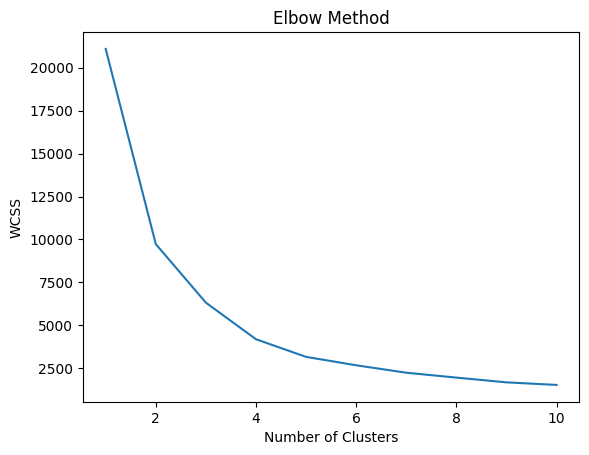

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The output is a Elbow Method graph. It is a visual tool used to determine the optimal number of clusters for K-Means clustering. It helps to find the point where adding more clusters does not significantly improve the model.

For the first few clusters( 1 - 3), there is a steep decrease in WCSS, indicating that adding more clusters significantly improves the model by reducing the within-cluster variance.

The "elbow" of the graph appears to be around 3 or 4 clusters. This is where the rate of decrease in WCSS starts to slow down, and the curve begins to bend.
This suggests that 3 or 4 clusters may be an optimal choice, as adding more clusters beyond this point results in diminishing returns.

Beyond 4 clusters, the WCSS continues to decrease but at a much slower rate. This indicates that additional clusters are not providing as much improvement in reducing the within-cluster variance.

Now fit the K-Means model using the optimal number of clusters determined from the Elbow method. I took optimal number of clusters as 3.

First, initialize K-Means with the optimal number of clusters using code `KMeans()`. Next, fit the model to the standardized features using `fit.()`. Then get the cluster labels using `labels_`. Finally, add cluster labels to the original DataFrame.

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

df['Cluster'] = labels
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin,MonthlyCharges_bin,MonthlyCharges_bin_encoded,tenure_bin_encoded,Cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,0-12,21-40,2,0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,25-36,41-60,3,2,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0-12,41-60,3,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,37-48,41-60,3,3,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,0-12,61-80,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Mailed check,84.80,1990.50,No,13-24,81-100,5,1,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Credit card (automatic),103.20,7362.90,No,61-72,101-120,6,5,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Yes,Electronic check,29.60,346.45,No,0-12,21-40,2,0,2
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Yes,Mailed check,74.40,306.60,Yes,0-12,61-80,4,0,0


Now you can see there is a new column called `Cluster` added to DataFrame. This label indicates which group or segment each customer belongs to based on the clustering performed on the standardized features.


Now let's create a statistical summary for each cluster value what is the mean `tenure`, `MonthlyChargers`, and `TotalCharges`.

In [ ]:
cluster_summary = df.groupby('Cluster').agg({
    'MonthlyCharges_bin_encoded': ['mean', 'median', 'std'],
    'tenure_bin_encoded': ['mean', 'median', 'std'],
    'TotalCharges': ['mean', 'median', 'std']
})

cluster_summary

MonthlyCharges_bin_encoded                  tenure_bin_encoded         \
                              mean median       std               mean median   
Cluster                                                                         
0                         4.311962    4.0  0.833183           0.616497    0.0   
1                         5.021932    5.0  0.887713           4.282315    5.0   
2                         1.933934    2.0  0.700039           1.966109    2.0   

                  TotalCharges                        
              std         mean   median          std  
Cluster                                               
0        0.823678  1031.392045   681.65   939.070733  
1        0.850166  5298.447527  5150.55  1454.008747  
2        1.749595   885.154354   768.05   745.703614

The output shows the average values for tenure, MonthlyCharges, and TotalCharges for each cluster, which can help you understand the characteristics of customers in each segment.

**Cluster 0**: This cluster consists of customers who have moderate monthly charges (mean of 4.31, corresponding to the 61-80 bin) and relatively low tenure (mean of 0.62). They have low total charges (mean of 1031.39), indicating they are new or have not accumulated much value despite being in a higher monthly charge bracket. These customers might be at risk of churn due to their short tenure and may require engagement to enhance satisfaction and loyalty.

**Cluster 1**: This cluster is characterized by customers who pay the highest monthly charges (mean of 5.02, corresponding to the 81-100 bin) and have a longer tenure (mean of 4.28). They have accumulated high total charges (mean of 5298.45), making them valuable to the telecom company. Given their longer time with the company and higher spending, these customers are likely less prone to churn but could be sensitive to service quality or competitive offers.

**Cluster 2**: Customers in this cluster have the lowest monthly charges (mean of 1.93, corresponding to the 0-20 bin) and a moderate tenure (mean of 1.97). They also have low total charges (mean of 885.15), indicating they are less valuable to the company. This group represents customers who might be more likely to churn due to their low level of investment in the service, making them a target for retention efforts.

Now I am going to create visualizations to explore the distribution and properties of each cluster. The output will be a scatter plot using Seaborn and Matplotlib to visualize customer clusters based on their MonthlyCharges and TotalCharges. For that import `seaborn` library and `matplotlib`. I already imported `matplotlib` library. Do the following code to get the graph.

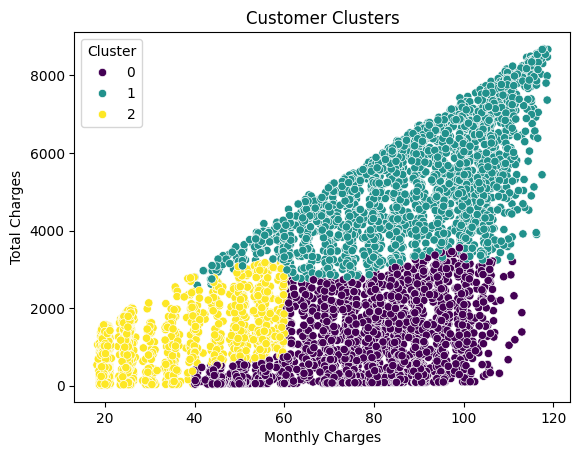

In [ ]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

## **Reduction**



 **Dimensionality Reduction**



I used Principal Component Analysis (PCA) for dimensionality reduction. This technique transforms the features of a dataset into a new set of orthogonal (uncorrelated) features called principal components.The main goal is to reduce the dimensionality of the dataset to 2 principal components using PCA.

The below code selects only the numeric columns from the dataset because PCA works with numerical data. It uses the `select_dtypes` method to filter columns of numeric types and stores them in the `features` DataFrame.

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
features = df[numeric_columns]

Before applying PCA, it’s important to standardize the features to have a mean of 0 and a standard deviation of 1. This step ensures that each feature contributes equally to the analysis.

The `fit_transform` method standardizes the features by removing the mean and scaling to unit variance. The result, `scaled_features`, is a standardized version of the original features.

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

I create a PCA object with `n_components=2`, which means I want to reduce the dataset to 2 principal components.

The `fit_transform` method is used to compute the principal components and transform the data into the new 2-dimensional space. The result, `pca_features`, contains the transformed data.

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

Now the two principal components obtained from PCA are added to the original DataFrame as new columns `PCA1` and `PCA2`. Each row in these columns represents the projection of the original data onto the principal component axes.

In [ ]:
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,tenure_bin,MonthlyCharges_bin,MonthlyCharges_bin_encoded,tenure_bin_encoded,Cluster,PCA1,PCA2
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0-12,21-40,2,0,2,-2.699350,0.491347
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,25-36,41-60,3,2,2,-0.635392,1.031419
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,0-12,41-60,3,0,0,-1.719675,-1.413882
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,37-48,41-60,3,3,2,-0.464419,1.606055
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,0-12,61-80,4,0,0,-1.183236,-1.852225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,84.80,1990.50,No,13-24,81-100,5,1,0,0.294084,-1.555324
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,103.20,7362.90,No,61-72,101-120,6,5,1,3.534771,0.700786
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,29.60,346.45,No,0-12,21-40,2,0,2,-2.465087,0.683227
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,74.40,306.60,Yes,0-12,61-80,4,0,0,-0.756709,-2.327324


In the DataFrame you can clearly see there are two new columns(`PCA1`, `PCA2`) created. The `PCA1` captures the most variance in the data, and the `PCA2` captures the second most variance.

Now I tranformed the dataset and add `PCA1` and `PCA2` as new columns. Therefore, I can visualize the data points in a 2D space using these components, which might help to identify clusters or patterns in customer behavior.

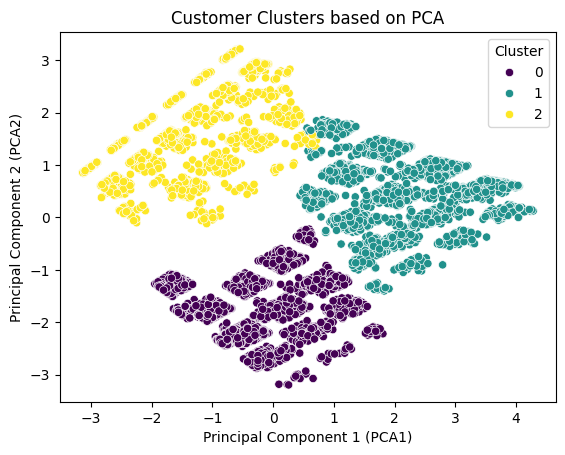

In [ ]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Clusters based on PCA')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.show()

Based on the graph we can understand,

*   If the data points form distinct groups in the PCA plot, it indicates that
there are natural clusters in the data. These clusters can represent different customer segments.
*   If the spread of points along PCA1 and PCA2 can give insights into the variability in customer behavior. A wide spread along PCA1 suggests significant variation along the most important dimension.
*   If clusters overlap significantly, it may indicate that the clusters are not well separated and additional features or clustering techniques might be needed to distinguish them better.











I'm going to output my updated data preprocessed dataset for further **analysis**

In [ ]:
df.to_csv('Data preprocessing part 1 completed dataset.csv', index=False)

# **Conclusion**

In the Customer Churn Prediction in the Telecom Industry project, I conducted extensive data cleaning and preprocessing to enhance data quality and model performance. This included removing inconsistencies and handling missing values through various techniques like binning and clustering. Additionally, I addressed high-dimensional data by implementing Principal Component Analysis (PCA) for dimensionality reduction. These steps ensured the dataset was well-prepared for accurate and effective churn prediction modeling, enabling better insights into customer behavior and trends.








# **Next Step: Data Preprocessing (Part II)**

The next part will focus on data reduction and transformation. This includes attribute subset selection and numerosity reduction through sampling or modeling. We'll also normalize the data, perform feature selection and engineering, discretize continuous data, and generate concept hierarchies. These steps aim to prepare the dataset for effective analysis and accurate churn prediction.